When a random circuit is applied to a product state, its entanglement typically increases. If all the qubits are measured in the resulting state, the state collapses into a product state, which is not entangled.

If only some qubits are measured with a given probability, and the state continues to evolve under a random circuit, then there's acompetition between random circuit dynamics and measurement. 

References  arXiv:1808.05953,  arXiv:1901.08092

This notebook illustrates this competition for a small number of qubits, using a random brickwork circuit.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import sys
sys.path.append('../src')
from statevector import*

In [5]:
# Setting up parameters

# the different qubit sizes to compare
n_arr=np.arange(10,14,2)

# probability of measurement at a given site
p_arr=np.linspace(0,1,20)

# number of layers for each system size
nstep_arr=[50,50]

# number of times each p,n is repeated to average over disorder instances
rep_arr=[60,60]

# initalize entanglement entropy array
ent_arr=np.zeros((len(n_arr),len(p_arr)))

In [7]:
# loop over all sizes and probability 


for i,n in enumerate(n_arr):
    print("n",n)
    for j,p in enumerate(p_arr):
        
        print("i,j",i,j)
        
        for repeat in range(rep_arr[i]):
        
            #initialize state to product state (all 0s)

            psi=qstate(n,random=False)

            psi.random_brickwork_evolve(nsteps=nstep_arr[i],p_meas=p)

            ent_arr[i,j]+=psi.compute_ent_ee()
        
        ent_arr[i,j]=ent_arr[i,j]/repeat # average

n 10
i,j 0 0
i,j 0 1
i,j 0 2
i,j 0 3
i,j 0 4
i,j 0 5
i,j 0 6
i,j 0 7
i,j 0 8
i,j 0 9
i,j 0 10
i,j 0 11
i,j 0 12
i,j 0 13
i,j 0 14
i,j 0 15
i,j 0 16
i,j 0 17
i,j 0 18
i,j 0 19
n 12
i,j 1 0
i,j 1 1
i,j 1 2
i,j 1 3
i,j 1 4
i,j 1 5
i,j 1 6
i,j 1 7
i,j 1 8
i,j 1 9
i,j 1 10
i,j 1 11
i,j 1 12
i,j 1 13
i,j 1 14
i,j 1 15
i,j 1 16
i,j 1 17
i,j 1 18
i,j 1 19


/var/folders/gn/tg2fv9294hzb3fxg5ms5v2fw0000gn/T/ipykernel_2807/1475669076.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('viridis',len(n_arr))


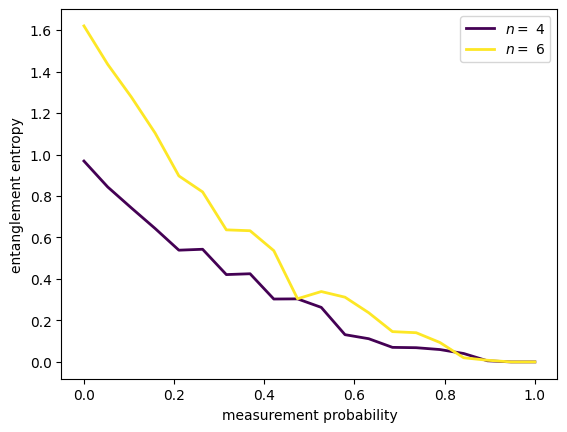

In [4]:
# plot entaglement entropy with p

cmap=cm.get_cmap('viridis',len(n_arr))

for i,n in enumerate(n_arr):
    plt.plot(p_arr,ent_arr[i,:],"-",color=cmap(i),label="$n = $ "+str(n),lw=2,markersize=1)

plt.xlabel("measurement probability")
plt.ylabel("entanglement entropy")
plt.legend()
plt.show()
